<img src='images/header.png' style='height: 50px; float: left'>

## Introduction to Computational Social Science methods with Python

# Session D1. Network analysis: Node-level analysis and community detection

Brockman on distance in networks (https://www.science.org/doi/abs/10.1126/science.1245200)

Facebook Small-World study

https://www.nature.com/articles/s41598-018-26951-y

Fariba's paper on perception biases

CHECK PLATT'S BOOK

...

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn how you can ...
</div>

## D1.1. Micro-level analysis

McLevey (2022, chapter 13) on walk structure and network flow; relevant for centrality; Zweig on network literacy

McLevey (2022, chapter 15) on shortest paths, betweenness centrality, degree centrality, eigenvector centrality, power centrality



In [1]:
import pickle

In [2]:
with open('../data/CNS/G_cns_fb_lcc.pickle', 'rb') as f:
    G_fb = pickle.load(f)
with open('../data/CNS/MD_cns_communication_week1_lcc.pickle', 'rb') as f:
    MD_communication = pickle.load(f)
with open('../data/CNS/D_cns_communication_week1_lcc.pickle', 'rb') as f:
    D_communication = pickle.load(f)
with open('../data/CNS/MG_cns_communication_week1_lcc.pickle', 'rb') as f:
    MG_communication = pickle.load(f)
with open('../data/CNS/G_cns_communication_week1_lcc.pickle', 'rb') as f:
    G_communication = pickle.load(f)
with open('../data/CNS/MG_cns_bt_f2f_p_lcc.pickle', 'rb') as f:
    MG_bt = pickle.load(f)
#with open('../data/CNS/G_cns_bt_f2f_p_lcc.pickle', 'rb') as f:
#    G_bt = pickle.load(f)

In [3]:
import pandas as pd

In [4]:
nodelist_fb = pd.DataFrame(index=G_fb.nodes())
nodelist_communication = pd.DataFrame(index=G_communication.nodes())
nodelist_bt = pd.DataFrame(index=MG_bt.nodes())

In [5]:
nodelist_fb.head()

""
0
512
263
525
285


### D1.1.1. Centrality analysis

The big picture: McLevey 15.4

> [A] centrality index is a real-valued function on the nodes of a graph, i.e., it assigns a number to all nodes. This value is only depending on the structure of the graph, not on external parameters associated with the nodes. (Zweig, K.A. 2016. Network Analysis Literacy (p.245). Springer.)

A centrality index quantifies a node's involvement in a given set of walks.

> In network analysis, we are often interested in whether something (e.g. information about the ominous-sounding agenda item) can travel from node i (e.g. Anika) to node j (e.g. Patrick). If it is indeed possible for that to happen, how many people would it have to go through to get there? And is there more than one way it might get there? If so, are some ways more efficient than others? If so, which ones? We can answer questions such as these about any nodes in a network by invoking the concept of a walk, which also provides both general and specific terminology for describing a wide variety of indirect relationships (Borgatti and Everett, 2020). (McLevey 2022, ch.13.6)

Walk: sequence of edges which joins a sequence of vertices (https://en.wikipedia.org/wiki/Path_(graph_theory))

(Platt, ch. 5)

#### Degree centrality

The __degree__ is the number of ties a node has.

The __degree centrality__ for a node _v_ is the fraction of nodes it is connected to. It measures potential communication activity. 

#### In-degree centrality
The __in-degree centrality__ for a node _v_ is the fraction of nodes its incoming edges are connected to.

#### Out-degree centrality
The __out-degree centrality__ for a node _v_ is the fraction of nodes its outgoing edges are connected to.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [7]:
import networkx as nx

In [8]:
[node for node in nx.neighbors(G=G_communication, n=4)]

[221, 266, 344, 424]

https://stackoverflow.com/questions/60067022/multidigraph-edges-from-networkx-draw-with-connectionstyle

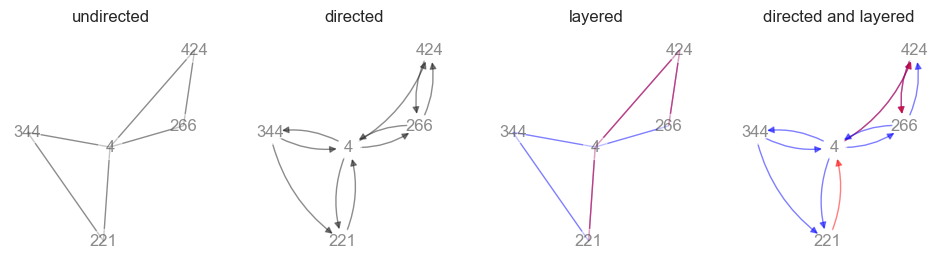

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].set_title('undirected')
nx.draw(
    G = G_communication.subgraph(nodes=[4, 221, 266, 344, 424]), 
    ax = axs[0], 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    with_labels = True, 
    node_color = 'white', 
    alpha = .5, 
    #edge_color = [key for u, v, key in G_communication.subgraph(nodes=[4, 221, 266, 344, 424]).edges.keys()], 
    edge_cmap = plt.cm.bwr, 
    connectionstyle = 'arc3, rad=0.2'
)
axs[1].set_title('directed')
nx.draw(
    G = D_communication.subgraph(nodes=[4, 221, 266, 344, 424]), 
    ax = axs[1], 
    pos = nx.get_node_attributes(G=D_communication, name='pos'), 
    with_labels = True, 
    node_color = 'white', 
    alpha = .5, 
    #edge_color = [key for u, v, key in D_communication.subgraph(nodes=[4, 221, 266, 344, 424]).edges.keys()], 
    edge_cmap = plt.cm.bwr, 
    connectionstyle = 'arc3, rad=0.2'
)
axs[2].set_title('layered')
nx.draw(
    G = MG_communication.subgraph(nodes=[4, 221, 266, 344, 424]), 
    ax = axs[2], 
    pos = nx.get_node_attributes(G=MG_communication, name='pos'), 
    with_labels = True, 
    node_color = 'white', 
    alpha = .5, 
    edge_color = [key for u, v, key in MG_communication.subgraph(nodes=[4, 221, 266, 344, 424]).edges.keys()], 
    edge_cmap = plt.cm.bwr, 
    connectionstyle = 'arc3, rad=0.2'
)
axs[3].set_title('directed and layered')
nx.draw(
    G = MD_communication.subgraph(nodes=[4, 221, 266, 344, 424]), 
    ax = axs[3], 
    pos = nx.get_node_attributes(G=MD_communication, name='pos'), 
    with_labels = True, 
    node_color = 'white', 
    alpha = .5, 
    edge_color = [key for u, v, key in MD_communication.subgraph(nodes=[4, 221, 266, 344, 424]).edges.keys()], 
    edge_cmap = plt.cm.bwr, 
    connectionstyle = 'arc3, rad=0.2'
)

In [10]:
n = 4

In [11]:
MG_communication.degree()[n]

6

In [12]:
[node for node in nx.neighbors(G=G_communication, n=n)]

[221, 266, 344, 424]

In [13]:
D_communication.in_degree()[n]

3

In [14]:
D_communication.out_degree()[n]

4

In [15]:
G_communication.degree(weight='weight')[n]

8.848592523524871

In [16]:
degree_communication = nx.degree_centrality(G_communication)
# in_degree_communication = nx.in_degree_centrality(D_communication)
#out_degree_communication = nx.out_degree_centrality(D_communication)

#weighted_degree = G_communication.degree(weight='weight')
#weighted_in_degree = D_communication.in_degree(weight='weight')
#weighted_out_degree = D_communication.out_degree(weight='weight')

In [17]:
nodelist_communication['degree'] = degree_communication.values()
#nodelist_communication['in_degree'] = in_degree_communication.values()
#nodelist_communication['out_degree'] = out_degree_communication.values()

#nodelist_communication['weighted_degree'] = weighted_degree_communication.values()
#nodelist_communication['weighted_in_degree'] = weighted_in_degree_communication.values()
#nodelist_communication['weighted_out_degree'] = weighted_out_degree_communication.values()

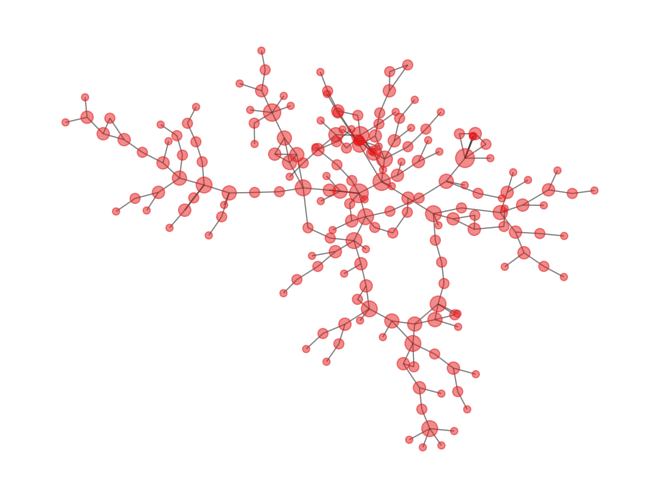

In [18]:
nx.draw(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = [5000*k for k in nodelist_communication['degree']], 
    node_color = '#e41a1c', 
    alpha = .5
)

#### Closeness centrality

The concept of walks is a way to think about distance in network terms.

Introduce paths and shortest paths

Introduce radial and length

This is based on the assumption that important nodes are close to other nodes. These metrics measure potential independence or efficiency.

__Closeness centrality__ of a node _u_ is the reciprocal of the average shortest path distance to _u_ over all _n-1_ reachable nodes. 
> Notice that the closeness distance function computes the incoming distance to _u_ for directed graphs. To use outward distance, act on _G.reverse()_.

`closeness_centrality(G, u=None, distance=None)` where `u` is node for which centrality should be calculated and `distance` edge attribute name that should be used to calculate distance in shortest pathes.
#closeness
Clothenes centrality do not differentiate between multiplex and singleplex network, i.e, multiple edges are not taken into account.  

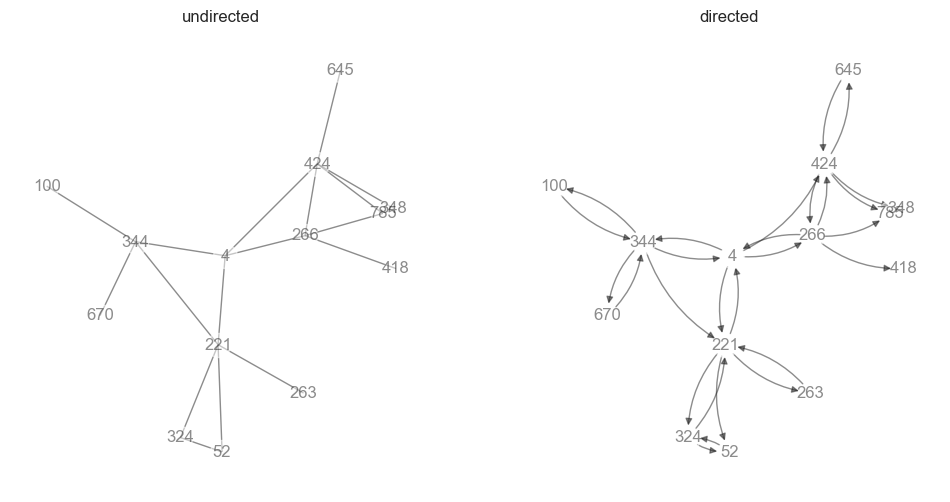

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('undirected')
nx.draw(
    G = G_communication.subgraph(nodes=[4, 52, 100, 221, 263, 266, 324, 344, 348, 418, 424, 645, 670, 785]), 
    ax = axs[0], 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    with_labels = True, 
    node_color = 'white', 
    alpha = .5, 
    connectionstyle = 'arc3, rad=0.2'
)
axs[1].set_title('directed')
nx.draw(
    G = D_communication.subgraph(nodes=[4, 52, 100, 221, 263, 266, 324, 344, 348, 418, 424, 645, 670, 785]), 
    ax = axs[1], 
    pos = nx.get_node_attributes(G=D_communication, name='pos'), 
    with_labels = True, 
    node_color = 'white', 
    alpha = .5, 
    connectionstyle = 'arc3, rad=0.2'
)

In [20]:
closeness_communication = nx.closeness_centrality(G_communication)
#in_closeness_communication = nx.closeness_centrality(D_communication)
#out_closeness_communication = nx.closeness_centrality(D_communication.reverse())

In [21]:
nodelist_communication['closeness'] = closeness_communication.values()
#nodelist_communication['in_closeness'] = in_closeness_communication.values()
#nodelist_communication['out_closeness'] = out_closeness_communication.values()

Distance

#closeness Clotheness centrality was defined as the inverse of farness, which in turn, is the sum of distances to all other nodes [1]. The intent behind this measure was to identify the nodes which could reach others quickly [2]. 

The weights of edges could be considered as costs in the shortest paths calculation. The least costly path connecting two nodes was the shortest path between them. To create a closeness measure, one should invert the numbers (1 divided by the weight). Thus, a high weight is transformed into a low closeness, and a low weight is transformed into a high closeness.



1. Freeman, L. C., 1978. Centrality in social networks: Conceptual clarification. Social Networks 1, 215-239.
2. Opsahl, T., Agneessens, F., Skvoretz, J., 2010. Node centrality in weighted networks: Generalizing degree and shortest paths. Social Networks 32 (3), 245-251.


In [22]:
for u, v, data in G_communication.edges(data=True):
    data['distance'] = 1 / data['weight']

for u, v, data in D_communication.edges(data=True):
    data['distance'] = 1 / data['weight']

In [23]:
#weighted_closeness_communication = nx.closeness_centrality(G=G_communication, distance='distance')
#weighted_in_closeness_communication = nx.closeness_centrality(G=D_communication, distance='distance')
#weighted_out_closeness_communication = nx.closeness_centrality(G=D_communication.reverse(), distance='distance')

In [24]:
#nodelist_communication['weighted_closeness'] = weighted_closeness_communication.values()
#nodelist_communication['weighted_in_closeness'] = weighted_in_closeness_communication.values()
#nodelist_communication['weighted_out_closeness'] = weighted_out_closeness_communication.values()

In [25]:
nodelist_communication

,degree,closeness
0,0.010363,0.127815
512,0.025907,0.142751
4,0.020725,0.108488
6,0.010363,0.116405
521,0.010363,0.134121
...,...,...
486,0.005181,0.143388
491,0.015544,0.104212
492,0.020725,0.098419
503,0.020725,0.098269


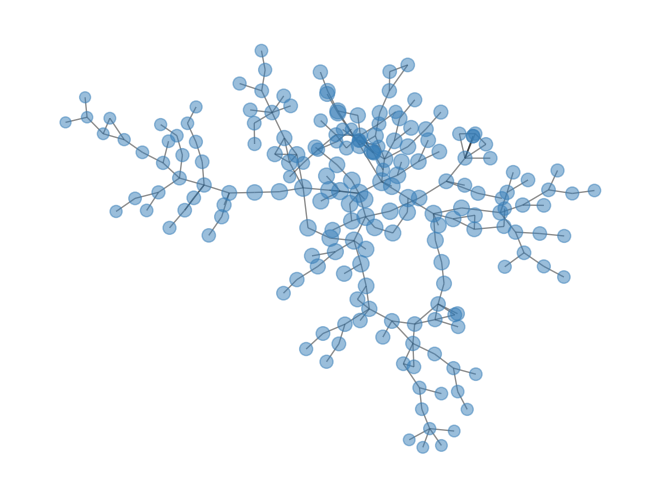

In [26]:
nx.draw(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = [1000*k for k in nodelist_communication['closeness']], 
    node_color = '#377eb8', 
    alpha = .5
)

#### Betweenness centrality

Introduce medial

In [27]:
shortest_path = nx.shortest_path(G=G_communication, source=383, target=656)
shortest_path

[383,
 682,
 405,
 688,
 158,
 415,
 485,
 472,
 90,
 358,
 521,
 268,
 611,
 176,
 401,
 190,
 372,
 193,
 179,
 656]

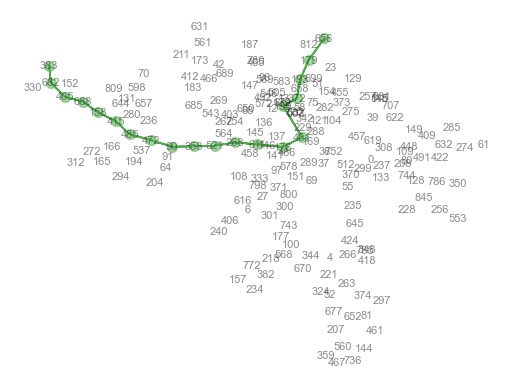

In [28]:
nx.draw_networkx_nodes(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    alpha = 0.
)
nx.draw_networkx_nodes(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    nodelist = shortest_path, 
    node_size = 50, 
    node_color = '#4daf4a', 
    alpha = .5
)
nx.draw_networkx_labels(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    font_size = 8, 
    alpha = .5
)
for e in range(len(shortest_path) - 1):
    nx.draw_networkx_edges(
        G = G_communication.subgraph(shortest_path), 
        pos = nx.get_node_attributes(G=G_communication, name='pos'), 
        alpha = .5, 
        edge_color = '#4daf4a'
    )
plt.box(False)

It assumes that important nodes connect other nodes. These metrics measure potential control. 

__Betweenness centrality__ of a node _v_ is the sum of the fraction of all-pairs shortest paths that pass through _v_.

`betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)` where `k` size of random samples to estimate betweenness, `weight` is the name of the attribute that should be used as distance metric and `seed` is random number generation state. 

More detail here https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html

In [29]:
betweenness_communication = nx.betweenness_centrality(G=G_communication, normalized=True)
#directed_betweenness_communication = nx.betweenness_centrality(G=D_communication, normalized=True)

#weighted_betweenness_communication = nx.betweenness_centrality(G=G_communication, normalized=True, weight='distance')
#weighted_directed_betweenness_communication = nx.betweenness_centrality(G=D_communication, normalized=True, weight='distance')

In [30]:
nodelist_communication['betweenness'] = betweenness_communication.values()
#nodelist_communication['directed_betweenness'] = directed_betweenness_communication.values()

#nodelist_communication['weighted_betweenness'] = weighted_betweenness_communication.values()
#nodelist_communication['weighted_directed_betweenness'] = weighted_directed_betweenness_communication.values()

Edge betweenness centrality

It assumes that important edges connect with many other nodes from different "clusters".  

Betweenness centrality of an edge `e` is the sum of the fraction of all-pairs shortest paths that pass through `e`.

`edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None)` 

More details find here https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html

In [31]:
edge_betweenness = nx.edge_betweenness_centrality(G_communication, normalized=True)

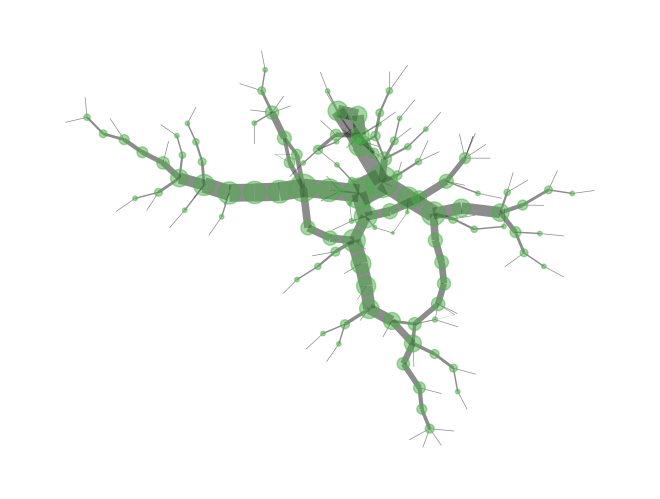

In [32]:
nx.draw(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = [1000*k for k in nodelist_communication['betweenness']], 
    node_color = '#4daf4a', 
    width = [50 * e for e in edge_betweenness.values()], 
    alpha = .5
)

BOX

Eigenvector cenrality (Platt 71)

### D1.1.2. Closure and brokerage

#### Closure: Clustering coefficient

Transitivity (Platt 74)

The clustering coefficient $CC(x)$ quantifies the **extent to which potential edges in a node’s neighborhood are realized**. It is a purely local measure, i.e., it only takes the immediate neighborhood of $x$ into account:

In [33]:
clustering_communication = nx.clustering(G_communication)

#weighted_clustering_communication = nx.clustering(G=G_communication, weight='weight')

In [34]:
nodelist_communication['clustering'] = clustering_communication.values()

#nodelist_communication['weighted_clustering'] = weighted_clustering_communication.values()

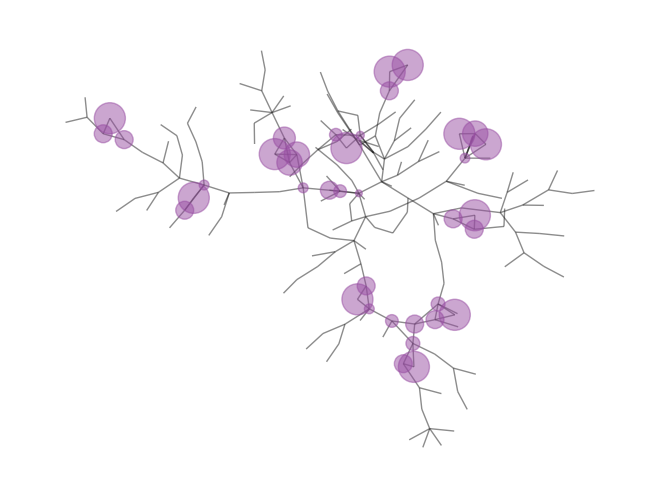

In [35]:
nx.draw(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = [500*k for k in nodelist_communication['clustering']], 
    node_color = '#984ea3', 
    alpha = .5
)

#### Closure: Local efficiency
Node local efficiency $E(x)$ is a generalization of the clustering coefficient. It quantifies the **extent to which neighbors of a node x can reach each other if x was removed**. It is a purely local measure:

In [36]:
def node_local_efficiency(G):
    d = {}
    for n in G.nodes():
        d[n] = nx.global_efficiency(G=nx.subgraph(G=G, nbunch=list(nx.neighbors(G=G, n=n))))
    return d

In [37]:
node_local_efficiency_communication = node_local_efficiency(G=G_communication)

In [38]:
nodelist_communication['node_local_efficiency'] = node_local_efficiency_communication.values()

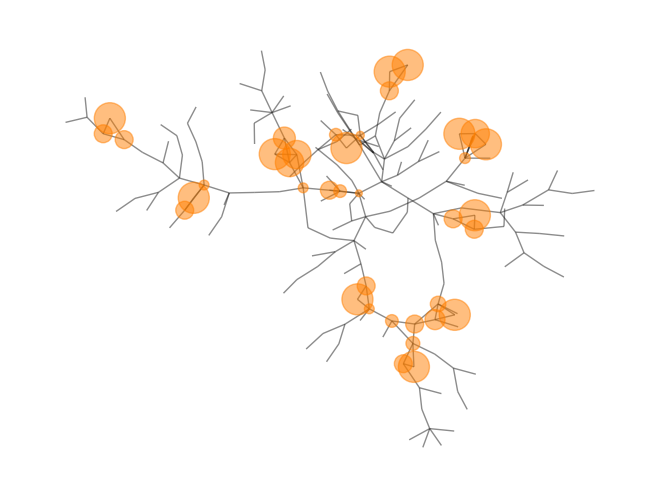

In [39]:
nx.draw(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = [500*k for k in nodelist_communication['node_local_efficiency']], 
    node_color = '#ff7f00', 
    alpha = .5
)

#### Brokerage: Effective size
Effective size $L(x)$ quantifies the **extent to which a node's neighbors are not connected among themselves**. It is also a purely local measure:

In [40]:
effective_size_communication = nx.effective_size(G=G_communication)

#weighted_effective_size_communication = nx.effective_size(G=G_communication, weight='weight')

In [41]:
nodelist_communication['effective_size'] = effective_size_communication.values()

#nodelist_communication['weighted_effective_size'] = weighted_effective_size_communication.values()

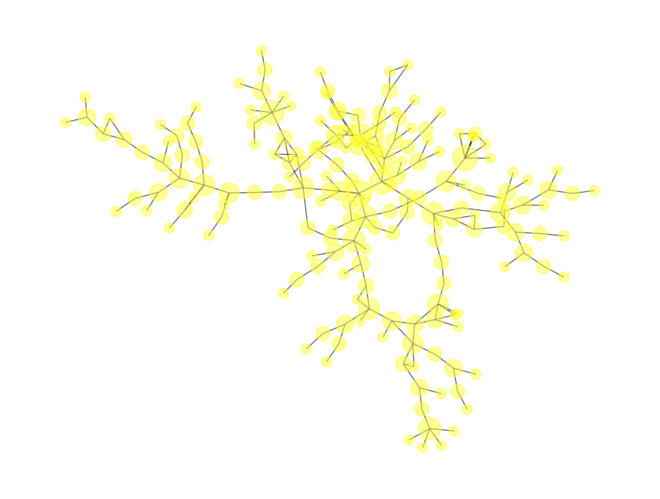

In [42]:
nx.draw(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = [50*k for k in nodelist_communication['effective_size']], 
    node_color = '#ffff33', 
    alpha = .5
)

#### Brokerage: Constraint
Constraint $M(x)$ quantifies the **extent to which node x is invested in those neighbors that are themselves invested in the neighbors of x**. It uses the 2-hop environment of $x$:

In [43]:
constraint_communication = nx.constraint(G=G_communication)

#weighted_constraint_communication = nx.constraint(G=G_communication, weight='weight')

In [44]:
nodelist_communication['constraint'] = constraint_communication.values()

#nodelist_communication['weighted_constraint'] = weighted_constraint_communication.values()

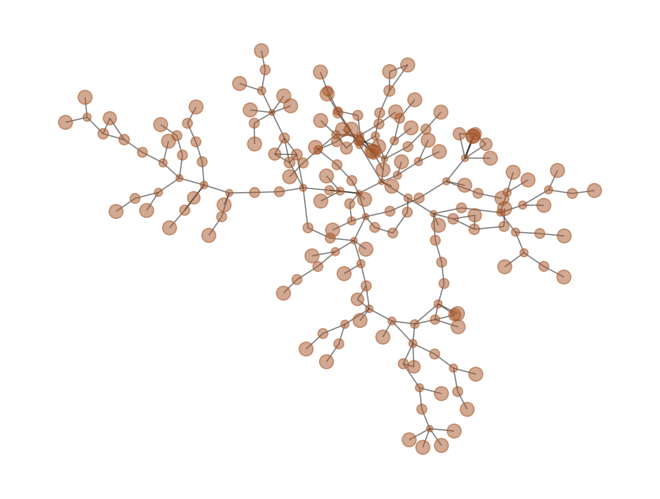

In [45]:
nx.draw(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = [100*k for k in nodelist_communication['constraint']], 
    node_color = '#a65628', 
    alpha = .5
)

#### Comparative analysis
We have computed standard measures for brokerage and closure:

In [46]:
nodelist_communication

,degree,closeness,betweenness,clustering,node_local_efficiency,effective_size,constraint
0,0.010363,0.127815,0.161485,0.000000,0.000000,2.0,0.500000
512,0.025907,0.142751,0.288986,0.000000,0.000000,5.0,0.200000
4,0.020725,0.108488,0.085636,0.333333,0.333333,3.0,0.375312
6,0.010363,0.116405,0.020617,0.000000,0.000000,2.0,0.500000
521,0.010363,0.134121,0.263925,0.000000,0.000000,2.0,0.500000
...,...,...,...,...,...,...,...
486,0.005181,0.143388,0.000000,0.000000,0.000000,1.0,1.000000
491,0.015544,0.104212,0.050950,0.000000,0.000000,3.0,0.333333
492,0.020725,0.098419,0.060827,0.166667,0.166667,3.5,0.350694
503,0.020725,0.098269,0.051166,0.000000,0.000000,4.0,0.250000


Knowing about the mathematical relationship of clustering coefficient and effective size, we want to see how our measures differ in practice. With pandas, we can easily get the correlation matrix:

In [47]:
nodelist_communication.corr()

,degree,closeness,betweenness,clustering,node_local_efficiency,effective_size,constraint
degree,1.000000,0.408340,0.680428,0.143051,0.155842,0.954274,-0.839087
closeness,0.408340,1.000000,0.569660,-0.026412,-0.020100,0.412525,-0.413429
betweenness,0.680428,0.569660,1.000000,-0.073177,-0.072226,0.710183,-0.588158
clustering,0.143051,-0.026412,-0.073177,1.000000,0.996944,-0.125794,0.065928
node_local_efficiency,0.155842,-0.020100,-0.072226,0.996944,1.000000,-0.119200,0.060746
effective_size,0.954274,0.412525,0.710183,-0.125794,-0.119200,1.000000,-0.870982
constraint,-0.839087,-0.413429,-0.588158,0.065928,0.060746,-0.870982,1.000000


Correlations are only negative when the constraint measure is involved. Unlike all other brokerage metrics, it is not a measure of "opportunity". Since constraint is properly normalized, we can subtract it from 1 to arrive at such a more comparable brokerage measure:

In [48]:
nodelist_communication['constraint'] = 1 - nodelist_communication['constraint']

#nodelist_communication['weighted_constraint'] = 1 - nodelist_communication['weighted_constraint']

We want to insights about which metrics produce similar results. Therefore, we use multidimensional scaling (MDS) to embed our data into a two-dimensional space. The algorithm of the sklearn package needs as input a dissimilarity matrix. The standard way to precompute dissimilarities from correlations is to subtract the latter from 1:

In [49]:
data = (1 - nodelist_communication.corr()).values

Now reduce dimensionality:

In [50]:
from sklearn.manifold import MDS

In [51]:
mds = MDS(n_components=2, random_state=42, dissimilarity='precomputed')
pos = mds.fit(data).embedding_

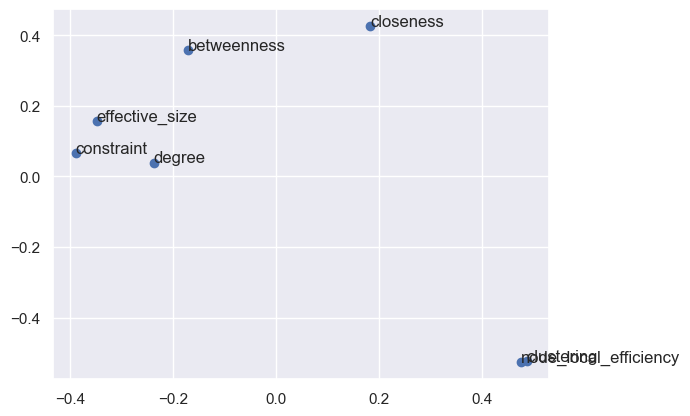

In [52]:
plt.scatter(pos[:, 0], pos[:, 1])
for i in range(0, len(nodelist_communication.columns)):
    plt.text(pos[i, 0], pos[i, 1], nodelist_communication.columns[i])

We see that clustering coefficient and its generalization, local efficiency, represent one group of metrics. From the literature we know that, in the limits of large data, these measures are inversely related to degree ([Ravasz & Barabási, 2003](https://doi.org/10.1103/PhysRevE.67.026112)). The other group consists of metrics that are more strongly correlated with degree (either positively or negatively, like constraint). Simmelian brokerage is strongly correlated with effective size. While the latter is mathematically related to the clustering coefficient, it is mathematically related to local efficiency. All these metrics are local ones. Constraint is constructed on a node's 2-hop environment. Due to this difference it is a viable alternative to quantifying brokerage opportunities. Betweenness is a global measure. The same is true for the global measure of betweenness centrality. Closeness, also a global measure, is somehow similar to all metrics and should not be used to measure brokerage or closure.

## D1.2. Community detection

McLevey (2022, chapter 14) on community detection

Menczer *et al.* (2020, chapter 6) on communities

Platt ch7

Girvan-Newman vs. Louvain

In [53]:
def get_layer(G, layer, prune=True):
    def filter_edge(u, v, key):
        return G.has_edge(u, v, layer)
    G_subgraph = nx.subgraph_view(G=G, filter_edge=filter_edge)
    if prune:
        def filter_node(v):
            return G_subgraph.degree[v] > 0
        G_subgraph_pruned = nx.subgraph_view(G=G_subgraph, filter_node=filter_node)
        return nx.Graph(G_subgraph_pruned)
    else:
        return nx.Graph(G_subgraph)

In [54]:
G_bt_snapshot1 = get_layer(G=MG_bt, layer=0, prune=True)
G_bt_snapshot1_lcc = G_bt_snapshot1.subgraph(nodes=sorted(nx.connected_components(G_bt_snapshot1), key=len, reverse=True)[0])

In [55]:
nodelist_bt_snapshot1_lcc = pd.DataFrame(index=G_bt_snapshot1_lcc.nodes())

### D1.2.1. Girvan-Newman

In [56]:
from networkx.algorithms.community import girvan_newman

In [57]:
communities = girvan_newman(G=G_bt_snapshot1_lcc)

In [58]:
#next(communities)

In [59]:
def get_partition(G, communities):
    d = dict(sorted({node: community for community in range(len(communities)) for node in list(communities[community])}.items()))
    return {node: d[node] for node in G.nodes()}

In [60]:
get_partition(G=G_bt_snapshot1_lcc, communities=next(communities))

{476: 0,
 407: 0,
 414: 0,
 411: 0,
 467: 0,
 588: 1,
 416: 0,
 67: 0,
 481: 0,
 152: 0,
 272: 1,
 358: 0,
 334: 0,
 287: 1,
 27: 1,
 355: 1,
 568: 0,
 395: 1,
 61: 1,
 507: 0,
 524: 0,
 260: 0,
 404: 0,
 151: 0,
 506: 0,
 100: 0,
 572: 0,
 3: 0,
 465: 0,
 570: 0,
 88: 0,
 492: 1,
 479: 1,
 176: 0,
 235: 0,
 378: 0,
 18: 0,
 196: 1,
 665: 0,
 484: 1,
 308: 1,
 266: 0,
 198: 0,
 166: 1,
 677: 0,
 97: 0,
 509: 0,
 659: 0,
 181: 0,
 449: 0,
 469: 1,
 145: 0,
 182: 0,
 148: 0,
 644: 1,
 41: 1,
 296: 1,
 195: 0,
 207: 0,
 550: 1,
 158: 1,
 274: 1,
 291: 1,
 330: 1,
 239: 0,
 383: 1,
 201: 0,
 146: 0,
 63: 0,
 178: 1,
 6: 1,
 177: 0,
 130: 1,
 109: 1,
 388: 0,
 56: 0,
 353: 0,
 636: 0,
 357: 0,
 83: 1,
 615: 1,
 571: 0,
 254: 0,
 29: 0,
 240: 0,
 90: 0,
 578: 0,
 139: 0,
 589: 1,
 546: 1,
 323: 1,
 637: 0,
 488: 0,
 600: 0,
 137: 0,
 335: 0,
 300: 0,
 559: 0,
 424: 0,
 611: 0,
 538: 1,
 147: 1,
 499: 0,
 382: 1,
 230: 1,
 485: 0,
 218: 1,
 454: 0,
 165: 1,
 301: 0}

In [61]:
pos_bt_snapshot1_lcc = nx.kamada_kawai_layout(G=G_bt_snapshot1_lcc, weight=None)

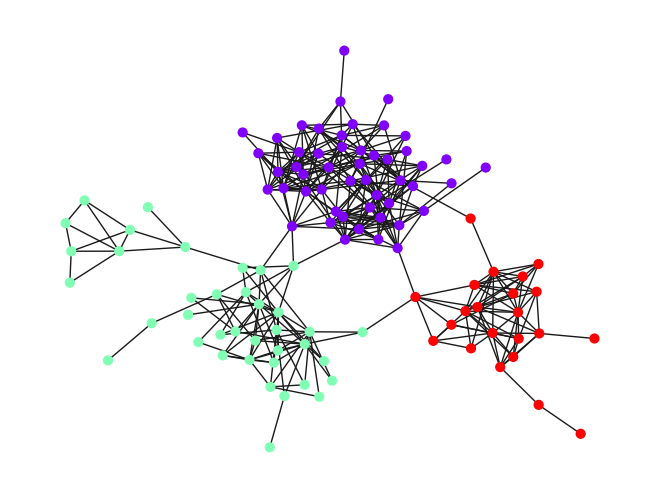

In [62]:
nx.draw(
    G = G_bt_snapshot1_lcc, 
    pos = pos_bt_snapshot1_lcc, 
    node_size = 40, 
    node_color = list(get_partition(G=G_bt_snapshot1_lcc, communities=next(communities)).values()), 
    cmap = plt.cm.rainbow
)

#### Modularity

In [63]:
from networkx.algorithms.community import modularity

In [64]:
partition = get_partition(G=G_bt_snapshot1_lcc, communities=next(communities))

In [65]:
def get_communities(partition):
    return [{node for node, community in partition.items() if community == value} for value in set(partition.values())]

In [66]:
modularity(G=G_bt_snapshot1_lcc, communities=get_communities(partition))

0.573805233931947

In [67]:
def girvan_newman_communities(G, n_communities, weight=None):
    nodelist = pd.DataFrame(index=G.nodes())
    modularities = []
    if weight:
        def most_central_edge(G):
            centrality = nx.edge_betweenness_centrality(G=G, weight=weight)
            return max(centrality, key=centrality.get)
        communities = girvan_newman(G=G, most_valuable_edge=most_central_edge)
    else:
        communities = girvan_newman(G=G)
    for i in range(2, n_communities + 1):
        partition = get_partition(G=G, communities=next(communities))
        nodelist[i] = partition.values()
        modularities.append(modularity(G=G, communities=get_communities(partition=partition)))
    return nodelist, modularities

the algorithm is slow for large networks.

In [68]:
partitions, modularities = girvan_newman_communities(G=G_bt_snapshot1_lcc, n_communities=20)

In [69]:
partitions

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
411,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4
218,1,1,1,1,1,1,1,1,1,9,10,11,12,13,14,15,15,16,16
454,0,0,0,0,0,0,0,8,9,10,11,12,13,14,15,16,16,17,18
165,1,1,1,4,4,5,5,5,5,5,6,7,8,9,10,11,11,11,11


In [70]:
modularities

[0.3472944234404537,
 0.5620680233931947,
 0.573805233931947,
 0.5726606805293005,
 0.5715013586956521,
 0.5703383447542533,
 0.569171638705104,
 0.5680012405482042,
 0.566812381852552,
 0.5634156427221173,
 0.5610600779773157,
 0.5586897448015125,
 0.6308261460302459,
 0.6179074610113423,
 0.6179406899810966,
 0.6162275519848773,
 0.6140085952268433,
 0.6116530304820418,
 0.6069271325614369]

In [71]:
n_communities_optimal = modularities.index(max(modularities)) + 2
n_communities_optimal

14

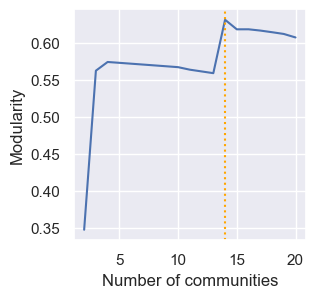

In [72]:
plt.figure(figsize=[3, 3])
plt.plot(partitions.columns, modularities)
plt.axvline(x=n_communities_optimal, color='orange', ls=':')
plt.xlabel('Number of communities')
plt.ylabel('Modularity')
plt.show()

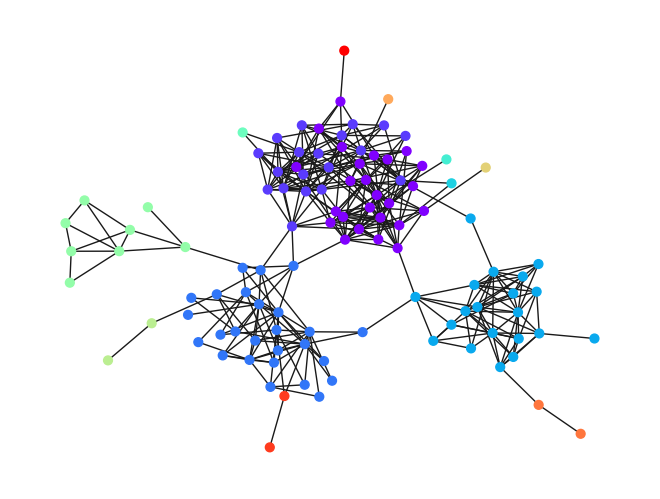

In [73]:
nx.draw(
    G = G_bt_snapshot1_lcc, 
    pos = pos_bt_snapshot1_lcc, 
    node_size = 40, 
    node_color = partitions[n_communities_optimal], 
    cmap = plt.cm.rainbow
)

In [74]:
len(G_bt_snapshot1_lcc.nodes())

110

In [75]:
partitions_weight, modularities_weight = girvan_newman_communities(G=G_bt_snapshot1_lcc, n_communities=5, weight='strength')

In [76]:
n_communities_optimal_weight = modularities_weight.index(max(modularities_weight)) + 2
n_communities_optimal_weight

4

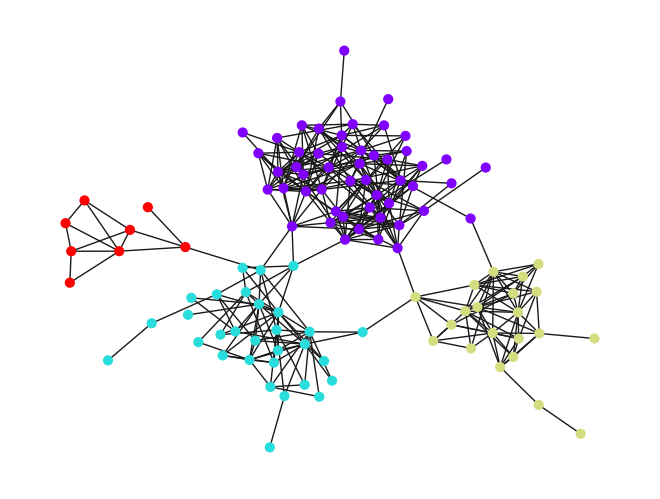

In [77]:
nx.draw(
    G = G_bt_snapshot1_lcc, 
    pos = pos_bt_snapshot1_lcc, 
    node_size = 40, 
    node_color = partitions_weight[n_communities_optimal_weight], 
    cmap = plt.cm.rainbow
)

### D.1.2.2. Louvain

In [78]:
from networkx.algorithms.community import louvain_communities

In [79]:
louvain = louvain_communities(G_bt_snapshot1_lcc, weight='weight', seed=42)

In [80]:
nodelist_bt_snapshot1_lcc['louvain'] = get_partition(G=G_bt_snapshot1_lcc, communities=louvain).values()
nodelist_bt_snapshot1_lcc

,louvain
476,2
407,2
414,0
411,0
467,2
...,...
485,3
218,5
454,3
165,5


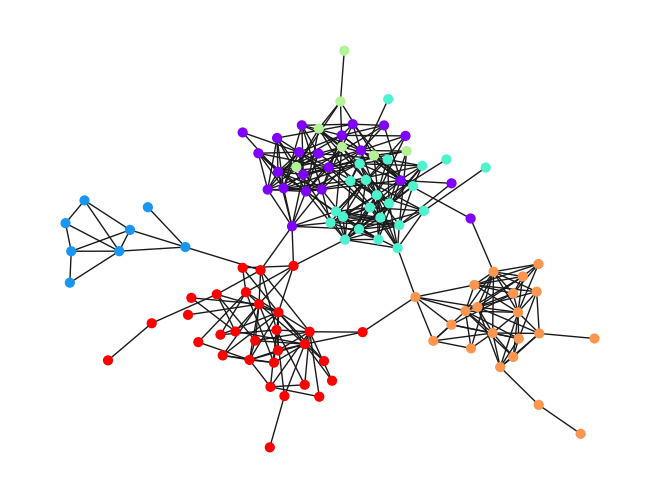

In [81]:
nx.draw(
    G = G_bt_snapshot1_lcc, 
    pos = pos_bt_snapshot1_lcc, 
    node_size = 40, 
    node_color = nodelist_bt_snapshot1_lcc['louvain'], 
    cmap = plt.cm.rainbow
)

#### Consensus clustering



In [82]:
import numpy as np

In [83]:
def louvain_consensus_communities(G, number_of_iterations=100, weight='weight', resolution=1., seed=42):
    a = np.empty([G.number_of_nodes(), number_of_iterations], dtype=object)
    number_of_communities = 0
    for i in range(number_of_iterations):
        a[:, i] = [community + number_of_communities for community in get_partition(G=G, communities=louvain_communities(G=G, weight=weight, resolution=resolution, seed=i)).values()]
        number_of_communities = max(a[:, i]) + 1
    a = a.astype(str)
    
    B = nx.Graph()
    B.add_nodes_from(G)
    for i in range(number_of_iterations):
        B.add_edges_from(zip(G.nodes(), a[:, i]))
    G_consensus = nx.bipartite.overlap_weighted_projected_graph(B=B, nodes=G.nodes())
    
    return louvain_communities(G=G_consensus, weight='weight', seed=seed)

In [84]:
louvain_consensus = louvain_consensus_communities(G=G_bt_snapshot1_lcc, number_of_iterations=10, resolution=1.)
nodelist_bt_snapshot1_lcc['louvain_consensus'] = get_partition(G=G_bt_snapshot1_lcc, communities=louvain_consensus).values()
nx.set_node_attributes(G=G_bt_snapshot1_lcc, values=nodelist_bt_snapshot1_lcc['louvain_consensus'], name='louvain_consensus')

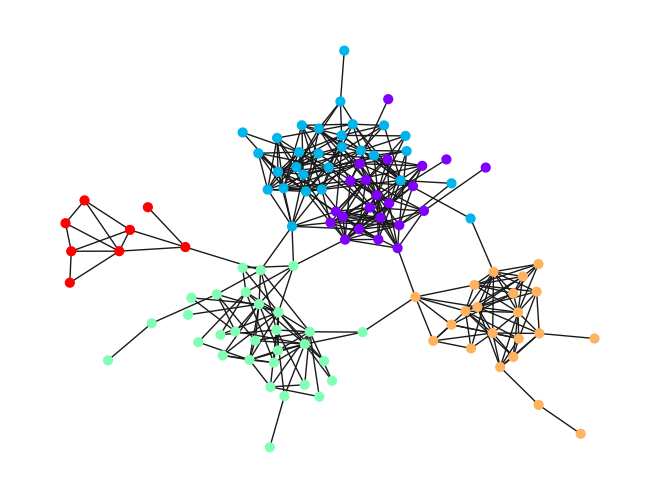

In [85]:
nx.draw(
    G = G_bt_snapshot1_lcc, 
    pos = pos_bt_snapshot1_lcc, 
    node_size = 40, 
    node_color = list(nx.get_node_attributes(G=G_bt_snapshot1_lcc, name='louvain_consensus').values()), 
    cmap = plt.cm.rainbow
)

#### Overlap of communities

In [86]:
louvain_consensus_mg = louvain_consensus_communities(G=MG_bt, number_of_iterations=10, resolution=1.)
nodelist_bt['louvain_consensus'] = get_partition(G=MG_bt, communities=louvain_consensus_mg).values()
nx.set_node_attributes(G=MG_bt, values=nodelist_bt['louvain_consensus'], name='louvain_consensus')

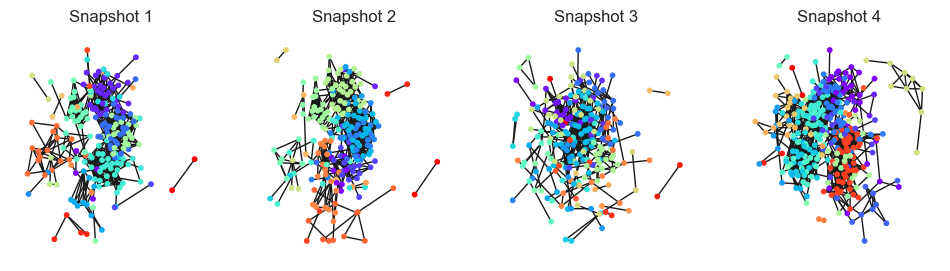

In [87]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for layer in range(4):
    axs[layer].set_title('Snapshot '+str(layer+1))
    #MG_bt_layer = nx.subgraph_view(G=MG_bt, filter_edge=filter_edge)
    #MG_bt_layer_pruned = nx.subgraph_view(G=MG_bt_layer, filter_node=filter_node)
    G_bt_snapshot_pruned = get_layer(G=MG_bt, layer=layer)
    partition_snapshot_pruned = get_partition(G=G_bt_snapshot_pruned, communities=louvain_communities(G=G_bt_snapshot_pruned))
    nx.draw(
        G = G_bt_snapshot_pruned, 
        ax = axs[layer], 
        pos = nx.get_node_attributes(G=MG_bt, name='pos'), 
        node_size = 10, 
        node_color = list(partition_snapshot_pruned.values()), #list(nx.get_node_attributes(G=MG_bt, name='louvain_consensus').values()), 
        cmap = plt.cm.rainbow
    )

In [88]:
def louvain_overlap_communities(G, overlap=.5, number_of_iterations=None, weight='weight', resolution=1.):
    number_of_layers = max([key for (u, v, key) in G.edges.keys()]) + 1
    a = np.empty([G.number_of_nodes(), number_of_layers], dtype=object)
    number_of_communities = 0
    def filter_edge_layer(u, v, key):
        return MG_bt.has_edge(u, v, key_filter)
    for key_filter in range(number_of_layers):
        G_layer = nx.subgraph_view(G=G, filter_edge=filter_edge_layer)
        if number_of_iterations:
            a[:, key_filter] = [community + number_of_communities for community in get_partition(G=G, communities=louvain_consensus_communities(G=G_layer, number_of_iterations=number_of_iterations, weight=weight, resolution=resolution, seed=key_filter)).values()]
        else:
            a[:, key_filter] = [community + number_of_communities for community in get_partition(G=G, communities=louvain_communities(G=G_layer, weight=weight, resolution=resolution, seed=key_filter)).values()]
        number_of_communities = max(a[:, key_filter]) + 1
    a = a.astype(str)
    
    B = nx.Graph()
    B.add_nodes_from(G)
    for key_filter in range(number_of_layers):
        B.add_edges_from(zip(G.nodes(), a[:, key_filter]))
    G_overlap = nx.bipartite.overlap_weighted_projected_graph(B=B, nodes=set(a.reshape(a.shape[0]*a.shape[1])))
    def filter_edge_overlap(u, v):
        if G_overlap[u][v]['weight'] > overlap:
            return G_overlap[u][v]['weight']
    G_overlap_filter = nx.subgraph_view(G=G_overlap, filter_edge=filter_edge_overlap)
    
    df = pd.DataFrame(a.astype(int), index=G.nodes())
    cc = nx.connected_components(G_overlap_filter)
    cc = [list(c) for c in cc]
    cc = [[int(i) for i in c] for c in cc]
    cc = [sorted(c) for c in cc]
    for i in range(len(cc)):
        size = len(cc[i])
        if size > 1:
            for j in range(1, size):
                df.replace(to_replace=cc[i][j], value=cc[i][0], inplace=True)
    
    mapping = pd.DataFrame(pd.concat([df[i] for i in range(df.shape[1])]).drop_duplicates(), columns=['community']).reset_index(drop=True)
    mapping = mapping.sort_values('community').reset_index(drop=True).reset_index().set_index('community')
    mapping = mapping.to_dict()['index']
    for column in df.columns:
        df[column] = df[column].map(mapping)
    
    return df

In [89]:
louvain_overlap = louvain_overlap_communities(G=MG_bt, overlap=.5, number_of_iterations=10, resolution=.5)

In [90]:
louvain_overlap.loc[132, :]

0    147
1    147
2    147
3    345
Name: 132, dtype: int64

In [91]:
louvain_overlap.loc[497, :]

0    147
1    147
2    147
3    329
Name: 497, dtype: int64

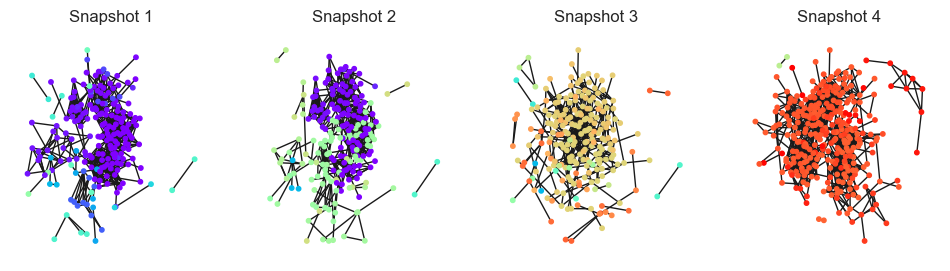

In [92]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for layer in range(4):
    axs[layer].set_title('Snapshot '+str(layer+1))
    nx.set_node_attributes(G=MG_bt, values=louvain_overlap[layer], name=str(layer))
    #MG_bt_layer = nx.subgraph_view(G=MG_bt, filter_edge=filter_edge)
    #MG_bt_layer_pruned = nx.subgraph_view(G=MG_bt_layer, filter_node=filter_node)
    G_bt_snapshot_pruned = get_layer(G=MG_bt, layer=layer)
    nx.draw(
        G = G_bt_snapshot_pruned, 
        ax = axs[layer], 
        pos = nx.get_node_attributes(G=MG_bt, name='pos'), 
        node_size = 10, 
        node_color = list(nx.get_node_attributes(G=G_bt_snapshot_pruned, name=str(layer)).values()), 
        cmap = plt.cm.rainbow, 
        vmin = louvain_overlap.min().min(), 
        vmax = louvain_overlap.max().max()
    )

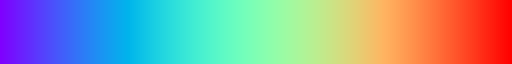

In [93]:
plt.cm.rainbow

#### Resolution limit

Underfitting problem (Peixoto 300)

BOX on Leiden, other algorithms, and SBM

## Commented references

### Recommended textbooks and NetworkX resources

Ma, E. & Seth, M. (2022). *Network Analysis Made Simple*. LeanPub. https://leanpub.com/nams. *An easy, well-maintained, and self-explanatory resource for NetworkX self-education that hides the inner workings of algorithms in custom functions. Use the [website](https://ericmjl.github.io/Network-Analysis-Made-Simple/) as a guide to Jupyter Notebooks on constructing, importing, exporting, and analyzing networks. You can also launch a binder session to execute notebooks in the cloud.*

Menczer, F., Fortunato, S., & Davis, C. A. (2020). *A First Course in Network Science*. Cambridge University Press. https://doi.org/10.1017/9781108653947. *An introductory course with exercises that emerged from years of teaching network analysis using NetworkX. Written from the physicist's perspective, this book is focused on the network science paradigms of small-world networks, scale-free networks, community detection, and complex systems modeling. The [website](https://cambridgeuniversitypress.github.io/FirstCourseNetworkScience/) provides all code in the form of Jupyter Notebooks, data, and solutions to the exercises.*

Platt, E. L. (2019). *Network Science with Python and NetworkX Quick Start Guide*. Packt. https://www.packtpub.com/product/network-science-with-python-and-networkx-quick-start-guide/9781789955316. *Systematic introduction to the practice of network preprocessing and analysis. Have a look at chapters 1–4 and 10–11 for the focus of session 2 here. All Jupyter Notebooks are publically available on the [website](https://github.com/PacktPublishing/Network-Science-with-Python-and-NetworkX-Quick-Start-Guide).*

### Advanced textbooks

Artime, O., Benigni, B., Bertagnolli, G., d'Andrea, V., Gallotti, R., Ghavasieh, A., Raimondo, S., & De Domenico, M. (2022). *Multilayer Network Science*. Cambridge University Press. https://doi.org/10.1017/9781009085809. *Interdisciplinary state-of-the-art account of the topic, quite advanced and mathematical.*

Caldarelli, G. & Chessa, A. (2016). *Data Science and Complex Networks: Real Case Studies with Python*. Oxford University Press. https://doi.org/10.1093/acprof:oso/9780199639601.001.0001. *Interdisciplinary display of case studies from the physics/complexity perspective. Jupyter Notebooks that use NetworkX but add many custom functions are available on the [website](https://github.com/datascienceandcomplexnetworks).*

### Other cited references

Breiger, R. L. (1974). "The duality of persons and groups". *Social Forces* 53:181–190. https://doi.org/10.1093/sf/53.2.181. *A fundamental paper about the sociological use of bipartite network structures.*

Freeman, L. (2004). *The Development of Social Network Analysis: A Study in the Sociology of Science*. Empirical Press. *The history of the field of Social Network Analysis as told by one of its founders.*

Fuhse, J. (2021). *Social Networks of Meaning and Communication*. Oxford University Press. https://doi.org/10.1093/oso/9780190275433.001.0001. *Accessible account of sociological network theory that delves deep into the mutual constitution of social networks and communication networks.*

Krempel, L. (2014). "Network visualization". In: Scott, J. & Carrington, P. J. (Eds.), *The SAGE Handbook of Social Network Analysis* (pp. 558-577). Sage. https://doi.org/10.4135/9781446294413. *A systematic overview how to visualize rich network information.*

Lee, M. & Martin, J. L. (2018). "Doorway to the dharma of duality". *Poetics* 68:18–30. https://doi.org/10.1016/j.poetic.2018.01.001. *A methodological account of socio-cultural analysis using publication data.*

Lietz, H., Schmitz, A., & Schaible, J. (2021). "Social Network Analysis with Digital Behavioral Data". *easy_social_sciences* 66:41–48. https://doi.org/10.15464/easy.2021.005. *A short and easily accessible introduction to the topic.*

Peixoto, T. P. (2015). "Inferring the mesoscale structure of layered, edge-valued, and time-varying networks". *Physical Review E* 92:042807. https://doi.org/10.1103/PhysRevE.92.042807. *Advanced stochastic analysis of various multilayer networks written in physics style.*

Sekara, V., Stopczynski, A., & Lehmann, S. (2016). "Fundamental structures of dynamic social networks". *Proceedings of the National Academy of Sciences* 113:9977–9982. https://doi.org/10.1073/pnas.1602803113. *Insightful multilayer analysis of the Copenhagen Networks Study interaction dataset.*

Sapiezynski, P., Stopczynski, A., Lassen, D. D., & Lehmann, S. (2019). "Interaction data from the Copenhagen Networks Study". *Scientific Data* 6:315 (2019). https://doi.org/10.1038/s41597-019-0325-x. *Description of one of the richest publicly available multilayer network datasets.*

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: Haiko Lietz & N. Gizem Bacaksizlar Turbic

Version date: 28. April 2023

License: ...
</div>

#### Notes to be removed before publication

- ...